Project 1-Group 10 
Food Desert and Chronic Conditions Analysis
By: Katy Fuentes

In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import requests
import gmaps
import os

import scipy.stats as sts

from scipy.stats import linregress
from sklearn import datasets

from pprint import pprint

In [2]:
#display all columns in data frams
pd.set_option('display.max_columns', 500)

In [3]:
#initial dataframe setup with census data

censusdf_kf = pd.read_csv(os.path.join("..", "Resources", "Census_Data_2015.csv"))

#censusdf_kf=censusdf_kf.astype('string')

print(censusdf_kf.dtypes)
print(censusdf_kf.shape)
censusdf_kf.head()



CENSUSTRACT       int64
State            object
County           object
Urban             int64
POP2010           int64
                  ...  
TractAIAN         int64
TractOMultir      int64
TractHispanic     int64
TractHUNV         int64
TractSNAP         int64
Length: 148, dtype: object
(72864, 148)


,CENSUSTRACT,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,Food Desert Score,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,0,0,0,0,0,0,10.0,74750,1,1,1,1,1,0,0,0,1357.480940,1732.225468,1357.480940,322.084612,411.690754,322.084612,1732.225468,0.905976,411.690754,0.215319,466.426429,0.243947,198.828220,0.103990,1482.881417,0.775566,184.319106,0.096401,12.718121,0.006652,0.000000,0.000000,13.969933,0.007306,38.336897,0.020051,39.695021,0.020761,21.556248,0.031106,101.877398,0.147009,1357.480940,0.709980,322.084612,0.168454,363.638381,0.190187,162.497246,0.084988,1161.802553,0.607637,147.487666,0.077138,11.015106,0.005761,0.000000,0.000000,9.996592,0.005228,27.179030,0.014215,29.715536,0.015542,9.772855,0.014102,79.546843,0.114786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,448,507,221,1622,217,14,0,14,45,44,26,112
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,0,0,0,0,0,0,18.2,51875,0,1,0,1,0,0,0,0,483.429683,1410.374828,483.429683,145.141418,475.306031,145.141418,1410.374828,0.649942,475.306031,0.219035,448.163512,0.206527,139.305390,0.064196,412.291349,0.189996,945.317796,0.435630,4.000000,0.001843,0.000000,0.000000,4.717582,0.002174,44.048101,0.020299,34.587909,0.015939,58.628965,0.078908,127.367745,0.171424,483.429683,0.222779,145.141418,0.066885,174.770470,0.080539,50.976822,0.023492,128.160995,0.059060,335.447721,0.154584,1.590927,0.000733,0.000000,0.000000,0.263511,0.000121,17.966531,0.008280,11.173590,0.005149,21.638336,0.029123,41.700964,0.056125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,763,606,214,888,1217,5,0,5,55,75,87,202
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,0,0,0,0,0,0,19.1,52905,1,1,1,1,1,0,0,0,1417.874893,2764.604126,1417.874893,696.636797,1350.176549,696.636797,2764.604126,0.819628,1350.176549,0.400290,744.891575,0.220839,346.203097,0.102640,2114.851375,0.626994,528.050101,0.156552,9.031083,0.002677,1.000000,0.000296,9.964775,0.002954,101.

In [4]:
#may need to change the county data in the data frame to string to read the same in spending data
censusdf_kf['County']=censusdf_kf['County'].astype('string')

print(censusdf_kf.dtypes)

censusdf_kf.head(10)

CENSUSTRACT       int64
State            object
County           string
Urban             int64
POP2010           int64
                  ...  
TractAIAN         int64
TractOMultir      int64
TractHispanic     int64
TractHUNV         int64
TractSNAP         int64
Length: 148, dtype: object


,CENSUSTRACT,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,Food Desert Score,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,0,0,0,0,0,0,10.0,74750,1,1,1,1,1,0,0,0,1357.480940,1732.225468,1357.480940,322.084612,411.690754,322.084612,1732.225468,0.905976,411.690754,0.215319,466.426429,0.243947,198.828220,0.103990,1482.881417,0.775566,184.319106,0.096401,12.718121,0.006652,0.000000,0.000000,13.969933,0.007306,38.336897,0.020051,39.695021,0.020761,21.556248,0.031106,101.877398,0.147009,1357.480940,0.709980,322.084612,0.168454,363.638381,0.190187,162.497246,0.084988,1161.802553,0.607637,147.487666,0.077138,11.015106,0.005761,0.000000,0.000000,9.996592,0.005228,27.179030,0.014215,29.715536,0.015542,9.772855,0.014102,79.546843,0.114786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,448,507,221,1622,217,14,0,14,45,44,26,112
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,0,0,0,0,0,0,18.2,51875,0,1,0,1,0,0,0,0,483.429683,1410.374828,483.429683,145.141418,475.306031,145.141418,1410.374828,0.649942,475.306031,0.219035,448.163512,0.206527,139.305390,0.064196,412.291349,0.189996,945.317796,0.435630,4.000000,0.001843,0.000000,0.000000,4.717582,0.002174,44.048101,0.020299,34.587909,0.015939,58.628965,0.078908,127.367745,0.171424,483.429683,0.222779,145.141418,0.066885,174.770470,0.080539,50.976822,0.023492,128.160995,0.059060,335.447721,0.154584,1.590927,0.000733,0.000000,0.000000,0.263511,0.000121,17.966531,0.008280,11.173590,0.005149,21.638336,0.029123,41.700964,0.056125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,763,606,214,888,1217,5,0,5,55,75,87,202
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,0,0,0,0,0,0,19.1,52905,1,1,1,1,1,0,0,0,141

In [5]:
#remove spaces after county
censusdf_kf['County']=censusdf_kf['County'].apply(lambda x: x.strip())

censusdf_kf

,CENSUSTRACT,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,Food Desert Score,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,0,0,0,0,0,0,10.0,74750,1,1,1,1,1,0,0,0,1357.480940,1732.225468,1357.480940,322.084612,411.690754,322.084612,1732.225468,0.905976,411.690754,0.215319,466.426429,0.243947,198.828220,0.103990,1482.881417,0.775566,184.319106,0.096401,12.718121,0.006652,0.000000,0.000000,13.969933,0.007306,38.336897,0.020051,39.695021,0.020761,21.556248,0.031106,101.877398,0.147009,1357.480940,0.709980,322.084612,0.168454,363.638381,0.190187,162.497246,0.084988,1161.802553,0.607637,147.487666,0.077138,11.015106,0.005761,0.000000,0.000000,9.996592,0.005228,27.179030,0.014215,29.715536,0.015542,9.772855,0.014102,79.546843,0.114786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,448,507,221,1622,217,14,0,14,45,44,26,112
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,0,0,0,0,0,0,18.2,51875,0,1,0,1,0,0,0,0,483.429683,1410.374828,483.429683,145.141418,475.306031,145.141418,1410.374828,0.649942,475.306031,0.219035,448.163512,0.206527,139.305390,0.064196,412.291349,0.189996,945.317796,0.435630,4.000000,0.001843,0.000000,0.000000,4.717582,0.002174,44.048101,0.020299,34.587909,0.015939,58.628965,0.078908,127.367745,0.171424,483.429683,0.222779,145.141418,0.066885,174.770470,0.080539,50.976822,0.023492,128.160995,0.059060,335.447721,0.154584,1.590927,0.000733,0.000000,0.000000,0.263511,0.000121,17.966531,0.008280,11.173590,0.005149,21.638336,0.029123,41.700964,0.056125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0

In [6]:
#testing grouping census data by county name and state to eliminate repeats in states
grouped_county_kf = censusdf_kf.groupby(['County', 'State']).sum()

grouped_county_kf.head(100)
print(grouped_county_kf.shape)
print(grouped_county_kf.columns)
grouped_county_kf
#then may add actual 

(3141, 146)
Index(['CENSUSTRACT', 'Urban', 'POP2010', 'OHU2010', 'GroupQuartersFlag',
       'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10', 'LILATracts_halfAnd10',
       'LILATracts_1And20',
       ...
       'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI',
       'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'],
      dtype='object', length=146)


CENSUSTRACT  Urban  POP2010  OHU2010  \
County    State                                                   
0         Alaska           15367941500      0    13798     5718   
Abbeville South Carolina  270011702100      1    25417     9990   
Acadia    Louisiana       264023527800      6    61773    22841   
Accomack  Virginia        561014674000      0    33164    13798   
Ada       Idaho           944059250831     55   392365   148445   
...                                ...    ...      ...      ...   
Yuma      Arizona         221489250739     42   195751    64767   
          Colorado         16251926300      0    10043     3952   
Zapata    Texas           145517851003      2    14018     4297   
Zavala    Texas           194031800903      1    11677     3573   
Ziebach   South Dakota     46137941600      0     2801      836   

                          GroupQuartersFlag  NUMGQTRS  PCTGQTRS  \
County    State                                                   
0         Alaska                          0       112  0.046837   
Abbeville South Carolina                  0       901  0.203551   
Acadia    Louisiana                       0      1050  0.198189   
Accomack  Virginia                        0       428  0.083130   
Ada       Idaho                           1      9714  1.620936   
...                                     ...       ...       ...   
Yuma      Arizona                         1      5921  2.204096   
          Colorado                        0       196  0.040881   
Zapata    Texas                           0        30  0.007455   
Zavala    Texas                           0       409  0.164058   
Ziebach   South Dakota                    0         0  0.000000   

                          LILATracts_1And10  LILATracts_halfAnd10  \
County    State                                                     
0         Alaska                          4                     4   
Abbeville South Carolina                  1                     1   
Acadia    Louisiana                       4                     6   
Accomack  Virginia                        1                     1   
Ada       Idaho                           2                    15   
...                                     ...                   ...   
Yuma      Arizona                        14                    32   
          Colorado                        2                     2   
Zapata    Texas                           3                     3   
Zavala    Texas                           3                     3   
Ziebach   South Dakota                    1                     1   

                          LILATracts_1And20  Food Desert Score  \
County    State                                                  
0         Alaska                          3                 11   
Abbeville South Carolina                  1                  3   
Acadia    Louisiana                       4                 14   
Accomack  Virginia                        0                  2   
Ada       Idaho                           2                 19   
...                                     ...                ...   
Yuma      Arizona                        12                 58   
          Colorado                        0                  4   
Zapata    Texas                           2                  8   
Zavala    Texas                           2                  8   
Ziebach   South Dakota                    1                  3   

                          LILATracts_Vehicle  HUNVFlag  LowIncomeTracts  \
County    State                                                           
0         Alaska                           3         2                5   
Abbeville South Carolina                   2         2                3   
Acadia    Louisiana                        3         5                6   
Accomack  Virginia                         6         7                8   
Ada       Idaho                            6        14               16   
.

In [7]:
#second dataframe setup with disease data
#os.path.join is different layout of  '..','Foldername','filename'
#whereas .to_csv('../Output/filename')

diseasespenddf_kf = pd.read_csv(os.path.join("..", "Resources", "County_Table_Chronic_Conditions_ActualSpending_2015noast.csv"))

print(diseasespenddf_kf.columns)

print(diseasespenddf_kf.dtypes)
print(diseasespenddf_kf.shape)

#strip() in python removes leading or ending spaces string function only
diseasespenddf_kf.head(10)

#checking the county with extra space
#diseasespenddf_kf.iloc[3,1]

#checking the state with extra space
#diseasespenddf_kf.iloc[3,0]

#diseasespenddf_kf[diseasespenddf_kf['County']=='Autauga']



Index(['State', 'County', 'State/County FIPS Code', 'Alcohol Abuse',
       'Alzheimer's Disease/Dementia', 'Arthritis ', 'Asthma',
       'Atrial Fibrillation', 'Autism Spectrum Disorders', 'Cancer',
       'Chronic Kidney Disease', 'COPD', 'Depression ', 'Diabetes',
       'Drug Abuse/Substance Abuse', 'HIV/AIDS', 'Heart Failure',
       'Hepatitis  (Chronic Viral B & C)', 'Hyperlipidemia', 'Hypertension',
       'Ischemic Heart Disease', 'Osteoporosis',
       'Schizophrenia/Other Psychotic Disorders', 'Stroke'],
      dtype='object')
State                                      object
County                                     object
State/County FIPS Code                     object
Alcohol Abuse                              object
Alzheimer's Disease/Dementia               object
Arthritis                                  object
Asthma                                     object
Atrial Fibrillation                        object
Autism Spectrum Disorders                  object
Cancer

,State,County,State/County FIPS Code,Alcohol Abuse,Alzheimer's Disease/Dementia,Arthritis,Asthma,Atrial Fibrillation,Autism Spectrum Disorders,Cancer,Chronic Kidney Disease,COPD,Depression,Diabetes,Drug Abuse/Substance Abuse,HIV/AIDS,Heart Failure,Hepatitis (Chronic Viral B & C),Hyperlipidemia,Hypertension,Ischemic Heart Disease,Osteoporosis,Schizophrenia/Other Psychotic Disorders,Stroke
0,National,,,"25,641.40","24,128.10","16,096.90","23,361.00","25,358.60","8,370.00","20,451.80","25,862.10","26,039.50","20,889.50","16,085.70","27,517.70","19,234.10","29,187.00","26,553.20","13,908.80","14,598.60","19,526.10","19,370.30","25,990.10","32,205.40"
1,Alabama,,,"21,541.20","20,458.10","13,461.10","19,518.80","20,781.50","6,344.70","17,904.20","21,635.40","21,189.90","17,531.50","13,381.10","19,816.60","14,992.90","23,330.80","22,184.70","11,503.70","11,907.80","15,972.10","16,413.90","22,502.10","26,116.90"
2,Alabama,Autauga,1001,"17,415.40","18,857.10","13,848.00","18,699.20","21,737.30",0,"18,210.90","22,049.80","21,621.70","17,920.00","12,954.40","25,691.00","11,276.10","24,212.90","28,462.30","11,513.10","12,269.00","15,418.20","19,541.70","20,022.60","24,239.80"
3,Alabama,Baldwin,1003,"20,484.50","18,071.30","12,252.10","17,315.20","18,829.60","11,436.70","16,638.70","19,921.60","19,485.80","16,188.60","11,931.70","17,520.60","18,052.10","21,967.90","14,020.00","10,159.30","10,958.50","13,703.10","14,808.70","24,602.80","23,378.30"
4,Alabama,Barbour,1005,"26,371.90","19,637.10","13,613.20","15,418.70","21,004.70",0,"15,206.80","22,073.70","20,523.30","17,280.50","12,949.80","28,442.50","20,956.90","25,380.90","25,781.40","10,549.20","11,303.30","17,270.00","17,323.80","19,889.00","23,519.20"
5,Alabama,Bibb,1007,"16,088.70","22,125.50","13,435.80","19,986.10","19,968.40",0,"17,652.40","20,331.70","20,528.00","17,537.60","14,072.80","24,931.30",0,"24,791.40","16,538.50","12,262.60","11,986.70","17,362.50","17,840.10","22,949.60","30,489.50"
6,Alabama,Blount,1009,"19,963.90","20,887.50","12,506.10","21,176.40","19,814.50",0,"19,628.00","21,482.90","21,108.50","16,360.10","12,571.20","16,723.10",0,"22,517.90","7,804.30","11,176.90","11,374.00","14,869.70","14,397.20","22,779.10","24,077.60"
7,Alabama,Bullock,1011,"23,212.20","25,080.80","13,577.30","20,814.90","23,251.60",0,"18,704.30","27,161.90","28,450.50","24,277.50","13,577.60","31,331.00",0,"25,018.70",0,"12,563.30","12,075.00","18,335.30","20,352.70","19,851.80","25,773.60"
8,Alabama,Butler,1013,"19,638.30","17,171.80","12,643.90","22,135.40","21,148.80",0,"18,253.70","21,776.90","18,120.00","16,565.70","12,823.50","23,622.60",0,"21,989.60","19,809.70","13,061.70","11,725.00","16,558.60","18,459.80","16,625.30","24,322.70"
9,Alabama,Calhoun,1015,"23,251.30","21,742.10","13,780.30","20,756.70","22,632.10",0,"19,263.90","22,558.60","22,508.90","18,278.80","14,112.10","20,742.90","25,285.30","23,007.60","21,814.20","11,881.80","12,307.10","15,943.70","15,177.20","24,314.00","28,166.80"


In [8]:
#.apply to entire county column /pandas function in series or dataframe inside .apply function every value
#lamba used in conjunction with pandas to quickly define a function x.strip can be replaced with other action
#be careful on runinning strip multiple times because reapplies

#removing disease data county spaces
diseasespenddf_kf['County']=diseasespenddf_kf['County'].apply(lambda x: x.strip())

diseasespenddf_kf
#diseasespenddf_kf.iloc[3,1]

,State,County,State/County FIPS Code,Alcohol Abuse,Alzheimer's Disease/Dementia,Arthritis,Asthma,Atrial Fibrillation,Autism Spectrum Disorders,Cancer,Chronic Kidney Disease,COPD,Depression,Diabetes,Drug Abuse/Substance Abuse,HIV/AIDS,Heart Failure,Hepatitis (Chronic Viral B & C),Hyperlipidemia,Hypertension,Ischemic Heart Disease,Osteoporosis,Schizophrenia/Other Psychotic Disorders,Stroke
0,National,,,"25,641.40","24,128.10","16,096.90","23,361.00","25,358.60","8,370.00","20,451.80","25,862.10","26,039.50","20,889.50","16,085.70","27,517.70","19,234.10","29,187.00","26,553.20","13,908.80","14,598.60","19,526.10","19,370.30","25,990.10","32,205.40"
1,Alabama,,,"21,541.20","20,458.10","13,461.10","19,518.80","20,781.50","6,344.70","17,904.20","21,635.40","21,189.90","17,531.50","13,381.10","19,816.60","14,992.90","23,330.80","22,184.70","11,503.70","11,907.80","15,972.10","16,413.90","22,502.10","26,116.90"
2,Alabama,Autauga,1001,"17,415.40","18,857.10","13,848.00","18,699.20","21,737.30",0,"18,210.90","22,049.80","21,621.70","17,920.00","12,954.40","25,691.00","11,276.10","24,212.90","28,462.30","11,513.10","12,269.00","15,418.20","19,541.70","20,022.60","24,239.80"
3,Alabama,Baldwin,1003,"20,484.50","18,071.30","12,252.10","17,315.20","18,829.60","11,436.70","16,638.70","19,921.60","19,485.80","16,188.60","11,931.70","17,520.60","18,052.10","21,967.90","14,020.00","10,159.30","10,958.50","13,703.10","14,808.70","24,602.80","23,378.30"
4,Alabama,Barbour,1005,"26,371.90","19,637.10","13,613.20","15,418.70","21,004.70",0,"15,206.80","22,073.70","20,523.30","17,280.50","12,949.80","28,442.50","20,956.90","25,380.90","25,781.40","10,549.20","11,303.30","17,270.00","17,323.80","19,889.00","23,519.20"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,Wyoming,Teton,56039,"27,488.10","14,987.70","12,472.70","16,031.50","20,317.50",0,"16,084.20","25,048.80","21,183.30","15,740.70","11,974.00","35,742.80",0,"23,627.80",0,"12,852.40","13,551.60","13,677.00","15,206.30","19,854.00","19,880.20"
3246,Wyoming,Uinta,56041,"14,672.10","17,418.20","15,540.70","25,124.70","19,138.90",0,"18,466.20","24,159.00","21,341.60","18,380.30","13,433.60","24,904.90",0,"20,935.00","22,372.30","13,416.60","14,409.80","15,728.30","19,530.90","15,406.90","30,676.80"
3247,Wyoming,Unknown,56999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3248,Wyoming,Washakie,56043,"15,630.80","18,145.90","17,507.90","25,800.30","26,727.00",0,"21,992.70","31,357.90","28,128.10","19,398.50","12,650.60","36,780.70",0,"26,130.40",0,"18,237.40","17,738.40","19,705.90","20,434.60","25,915.70","36,864.70"


In [9]:
#removing disease data state spaces
#lamba is replacing the need to defines function 'remove space' (x)=argument in function 
#def removespace(x):
    #return x.strip()

diseasespenddf_kf['State']=diseasespenddf_kf['State'].apply(lambda x: x.strip())

diseasespenddf_kf

,State,County,State/County FIPS Code,Alcohol Abuse,Alzheimer's Disease/Dementia,Arthritis,Asthma,Atrial Fibrillation,Autism Spectrum Disorders,Cancer,Chronic Kidney Disease,COPD,Depression,Diabetes,Drug Abuse/Substance Abuse,HIV/AIDS,Heart Failure,Hepatitis (Chronic Viral B & C),Hyperlipidemia,Hypertension,Ischemic Heart Disease,Osteoporosis,Schizophrenia/Other Psychotic Disorders,Stroke
0,National,,,"25,641.40","24,128.10","16,096.90","23,361.00","25,358.60","8,370.00","20,451.80","25,862.10","26,039.50","20,889.50","16,085.70","27,517.70","19,234.10","29,187.00","26,553.20","13,908.80","14,598.60","19,526.10","19,370.30","25,990.10","32,205.40"
1,Alabama,,,"21,541.20","20,458.10","13,461.10","19,518.80","20,781.50","6,344.70","17,904.20","21,635.40","21,189.90","17,531.50","13,381.10","19,816.60","14,992.90","23,330.80","22,184.70","11,503.70","11,907.80","15,972.10","16,413.90","22,502.10","26,116.90"
2,Alabama,Autauga,1001,"17,415.40","18,857.10","13,848.00","18,699.20","21,737.30",0,"18,210.90","22,049.80","21,621.70","17,920.00","12,954.40","25,691.00","11,276.10","24,212.90","28,462.30","11,513.10","12,269.00","15,418.20","19,541.70","20,022.60","24,239.80"
3,Alabama,Baldwin,1003,"20,484.50","18,071.30","12,252.10","17,315.20","18,829.60","11,436.70","16,638.70","19,921.60","19,485.80","16,188.60","11,931.70","17,520.60","18,052.10","21,967.90","14,020.00","10,159.30","10,958.50","13,703.10","14,808.70","24,602.80","23,378.30"
4,Alabama,Barbour,1005,"26,371.90","19,637.10","13,613.20","15,418.70","21,004.70",0,"15,206.80","22,073.70","20,523.30","17,280.50","12,949.80","28,442.50","20,956.90","25,380.90","25,781.40","10,549.20","11,303.30","17,270.00","17,323.80","19,889.00","23,519.20"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,Wyoming,Teton,56039,"27,488.10","14,987.70","12,472.70","16,031.50","20,317.50",0,"16,084.20","25,048.80","21,183.30","15,740.70","11,974.00","35,742.80",0,"23,627.80",0,"12,852.40","13,551.60","13,677.00","15,206.30","19,854.00","19,880.20"
3246,Wyoming,Uinta,56041,"14,672.10","17,418.20","15,540.70","25,124.70","19,138.90",0,"18,466.20","24,159.00","21,341.60","18,380.30","13,433.60","24,904.90",0,"20,935.00","22,372.30","13,416.60","14,409.80","15,728.30","19,530.90","15,406.90","30,676.80"
3247,Wyoming,Unknown,56999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3248,Wyoming,Washakie,56043,"15,630.80","18,145.90","17,507.90","25,800.30","26,727.00",0,"21,992.70","31,357.90","28,128.10","19,398.50","12,650.60","36,780.70",0,"26,130.40",0,"18,237.40","17,738.40","19,705.90","20,434.60","25,915.70","36,864.70"


In [10]:
#combine the data into a single dataset by actual spending data to census data on county and state
combined_data_kf = pd.merge(grouped_county_kf, diseasespenddf_kf, how ='left', on=['County','State'])
print(f" Combined Data Shape: {combined_data_kf.shape}")

print(combined_data_kf.columns)
# Display the data table for preview
print(combined_data_kf.dtypes)
combined_data_kf.head(10)

#save csv file
combined_data_kf.to_csv('../Output/combocensus_disease_data.csv')

 Combined Data Shape: (3141, 170)
Index(['County', 'State', 'CENSUSTRACT', 'Urban', 'POP2010', 'OHU2010',
       'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10',
       ...
       'Drug Abuse/Substance Abuse', 'HIV/AIDS', 'Heart Failure',
       'Hepatitis  (Chronic Viral B & C)', 'Hyperlipidemia', 'Hypertension',
       'Ischemic Heart Disease', 'Osteoporosis',
       'Schizophrenia/Other Psychotic Disorders', 'Stroke'],
      dtype='object', length=170)
County                                     object
State                                      object
CENSUSTRACT                                 int64
Urban                                       int64
POP2010                                     int64
                                            ...  
Hypertension                               object
Ischemic Heart Disease                     object
Osteoporosis                               object
Schizophrenia/Other Psychotic Disorders    object
Stroke                 

In [11]:
#locate census data with food desert score of 3 only based on combined data
fooddesert3_kf = combined_data_kf[combined_data_kf['Food Desert Score'] == 3]
print(fooddesert3_kf.columns)
fooddesert3_kf.to_csv('../Output/comboFD3_census_disease_data.csv')

#fooddesert3_kf['Food Desert Score']
print(fooddesert3_kf.shape)
fooddesert3_kf['Drug Abuse/Substance Abuse'].dtypes
fooddesert3_kf.head(10)

Index(['County', 'State', 'CENSUSTRACT', 'Urban', 'POP2010', 'OHU2010',
       'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10',
       ...
       'Drug Abuse/Substance Abuse', 'HIV/AIDS', 'Heart Failure',
       'Hepatitis  (Chronic Viral B & C)', 'Hyperlipidemia', 'Hypertension',
       'Ischemic Heart Disease', 'Osteoporosis',
       'Schizophrenia/Other Psychotic Disorders', 'Stroke'],
      dtype='object', length=170)
(375, 170)


,County,State,CENSUSTRACT,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,Food Desert Score,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,State/County FIPS Code,Alcohol Abuse,Alzheimer's Disease/Dementia,Arthritis,Asthma,Atrial Fibrillation,Autism Spectrum Disorders,Cancer,Chronic Kidney Disease,COPD,Depression,Diabetes,Drug Abuse/Substance Abuse,HIV/AIDS,Heart Failure,Hepatitis (Chronic Viral B & C),Hyperlipidemia,Hypertension,Ischemic Heart Disease,Osteoporosis,Schizophrenia/Other Psychotic Disorders,Stroke
1,Abbeville,South Carolina,270011702100,1,25417,9990,0,901,0.203551,1,1,1,3,2,2,3,133.5,286993,1,1,1,1,1,0,0,2,2670.978027,4810.801137,2653.388364,1022.169242,2292.322126,1011.902574,22908.399055,5.479427,10098.238965,2.389388,5202.262292,1.232419,3748.088259,0.910029,16508.441376,4.020295,5931.897316,1.346204,70.965975,0.015524,5.000000,0.001597,53.454164,0.013976,338.640232,0.081830,221.126467,0.051704,608.129217,0.348439,1507.314050,0.908475,17314.364610,4.270243,7220.222442,1.770478,3865.030763,0.945122,2805.044534,0.705973,13543.924324,3.369401,3448.008961,0.819275,51.371294,0.012162,5.000000,0.001597,40.550174,0.010690,225.509856,0.057118,143.248971,0.035483,335.334489,0.221616,1062.217115,0.666348,17.589663,0.004193,10.266668,0.002447,4.633035,0.001104,2.230228,0.000532,9.610471,0.002291,7.979192,1.902072e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.577092,0.000418,0.856709,0.000620,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11170,5787,4203,17691,7187,75,5,60,399,255,708,1663,45001,"28,180.20","22,667.30","15,886.10","23,816.90","25,889.70",0,"18,939.00","26,355.90","23,890.40","19,880.60","13,815.00","15,557.90",0,"26,288.10","36,081.00","13,171.60","13,278.50","18,557.40","18,744.90","25,286.20","25,109.90"
8,Adair,Oklahoma,200006884000,1,22683,8156,0,92,0.020287,1,1,1,3,2,2,4,132.4,201731,1,1,1,1,1,0,0,2,2085.749310,3747.034872,876.764422,1155.465706,2282.479093,564.838001,20338.520025,4.494518,11285.598538,2.441390,5623.698913,1.235513,2686.632800,0.595469,8948.223885,2.043758,41.977725,0.008523,114.912677,0.023864,1.000000,0.0

In [12]:
#sort food desert 3 by highest population
fooddesert3sort_kf = fooddesert3_kf.sort_values(by=["POP2010"], ascending=False)
fooddesert3sort_kf

,County,State,CENSUSTRACT,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,Food Desert Score,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,State/County FIPS Code,Alcohol Abuse,Alzheimer's Disease/Dementia,Arthritis,Asthma,Atrial Fibrillation,Autism Spectrum Disorders,Cancer,Chronic Kidney Disease,COPD,Depression,Diabetes,Drug Abuse/Substance Abuse,HIV/AIDS,Heart Failure,Hepatitis (Chronic Viral B & C),Hyperlipidemia,Hypertension,Ischemic Heart Disease,Osteoporosis,Schizophrenia/Other Psychotic Disorders,Stroke
84,Arlington,Virginia,3009774777558,59,207627,98050,1,2892,1.394404,0,3,0,3,2,10,9,466.6,7848252,3,33,3,33,3,0,0,10,4485.108838,70522.240105,4485.108838,174.334441,9899.971932,174.334441,70522.240105,21.082054,9899.971932,2.883777,13567.002667,3.546475,7251.220090,1.967217,53044.346644,16.066836,6228.824932,1.808599,5641.479450,1.629806,59.577182,0.018024,244.102777,0.073582,5303.909153,1.485207,8299.326456,2.298655,2685.630274,1.871785,1133.054965,0.882060,4485.108838,1.238403,174.334441,0.036385,1085.737769,0.198416,727.540898,0.134662,3968.825352,1.145713,176.641799,0.030870,153.279272,0.028494,6.100862,0.001250,11.513079,0.002016,168.748502,0.030061,226.591230,0.042170,20.366858,0.011926,3.346864,0.002306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38380,32626,18054,148970,17632,19931,171,971,19952,31382,11285,3468,51013,"23,522.60","20,358.20","14,138.90","19,094.70","24,625.90","12,160.10","19,289.70","24,659.90","23,032.30","19,403.30","13,801.90","26,727.20","12,633.50","28,511.60","16,857.20","12,075.50","13,189.10","17,902.70","15,281.70","20,508.40","29,633.30"
542,Clay,Florida,360570921772,22,190865,68792,0,1251,0.264311,1,1,1,3,1,6,7,361.8,1943698,17,21,17,21,17,0,0,6,77666.783375,129872.087548,77439.645767,18628.352830,32418.242499,18536.764890,162912.983762,24.568966,45965.107010,7.570406,43284.387263,5.968980,18627.296868,3.342624,133860.677697,20.900228,15793.738565,1.962594,47

In [13]:
#display top 5 states with food deserts
fooddesert3top5_kf = fooddesert3sort_kf[:5]
fooddesert3top5_kf


,County,State,CENSUSTRACT,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,Food Desert Score,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,State/County FIPS Code,Alcohol Abuse,Alzheimer's Disease/Dementia,Arthritis,Asthma,Atrial Fibrillation,Autism Spectrum Disorders,Cancer,Chronic Kidney Disease,COPD,Depression,Diabetes,Drug Abuse/Substance Abuse,HIV/AIDS,Heart Failure,Hepatitis (Chronic Viral B & C),Hyperlipidemia,Hypertension,Ischemic Heart Disease,Osteoporosis,Schizophrenia/Other Psychotic Disorders,Stroke
84,Arlington,Virginia,3009774777558,59,207627,98050,1,2892,1.394404,0,3,0,3,2,10,9,466.6,7848252,3,33,3,33,3,0,0,10,4485.108838,70522.240105,4485.108838,174.334441,9899.971932,174.334441,70522.240105,21.082054,9899.971932,2.883777,13567.002667,3.546475,7251.220090,1.967217,53044.346644,16.066836,6228.824932,1.808599,5641.479450,1.629806,59.577182,0.018024,244.102777,0.073582,5303.909153,1.485207,8299.326456,2.298655,2685.630274,1.871785,1133.054965,0.882060,4485.108838,1.238403,174.334441,0.036385,1085.737769,0.198416,727.540898,0.134662,3968.825352,1.145713,176.641799,0.030870,153.279272,0.028494,6.100862,0.001250,11.513079,0.002016,168.748502,0.030061,226.591230,0.042170,20.366858,0.011926,3.346864,0.002306,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38380,32626,18054,148970,17632,19931,171,971,19952,31382,11285,3468,51013,"23,522.60","20,358.20","14,138.90","19,094.70","24,625.90","12,160.10","19,289.70","24,659.90","23,032.30","19,403.30","13,801.90","26,727.20","12,633.50","28,511.60","16,857.20","12,075.50","13,189.10","17,902.70","15,281.70","20,508.40","29,633.30"
542,Clay,Florida,360570921772,22,190865,68792,0,1251,0.264311,1,1,1,3,1,6,7,361.8,1943698,17,21,17,21,17,0,0,6,77666.783375,129872.087548,77439.645767,18628.352830,32418.242499,18536.764890,162912.983762,24.568966,45965.107010,7.570406,43284.387263,5.968980,18627.296868,3.342624,133860.677697,20.900228,15793.738565,1.962594,4725.110011,0.561213,182.003312,0.026473,746.292271,0.119166,7605.161891,0.999293,11868.742176,1.546987,

In [14]:
#locate census data with food desert score of 2 only based on combined data
fooddesert2_kf = combined_data_kf[combined_data_kf['Food Desert Score'] == 2]
print(fooddesert2_kf.columns)
print(fooddesert2_kf.shape)
fooddesert2_kf

Index(['County', 'State', 'CENSUSTRACT', 'Urban', 'POP2010', 'OHU2010',
       'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10',
       ...
       'Drug Abuse/Substance Abuse', 'HIV/AIDS', 'Heart Failure',
       'Hepatitis  (Chronic Viral B & C)', 'Hyperlipidemia', 'Hypertension',
       'Ischemic Heart Disease', 'Osteoporosis',
       'Schizophrenia/Other Psychotic Disorders', 'Stroke'],
      dtype='object', length=170)
(259, 170)


,County,State,CENSUSTRACT,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,Food Desert Score,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,State/County FIPS Code,Alcohol Abuse,Alzheimer's Disease/Dementia,Arthritis,Asthma,Atrial Fibrillation,Autism Spectrum Disorders,Cancer,Chronic Kidney Disease,COPD,Depression,Diabetes,Drug Abuse/Substance Abuse,HIV/AIDS,Heart Failure,Hepatitis (Chronic Viral B & C),Hyperlipidemia,Hypertension,Ischemic Heart Disease,Osteoporosis,Schizophrenia/Other Psychotic Disorders,Stroke
3,Accomack,Virginia,561014674000,0,33164,13798,0,428,0.083130,1,1,0,2,6,7,8,265.0,393774,1,1,0,0,0,1,0,7,727.000007,727.000007,0.000000,334.270105,334.270105,0.000000,30821.649380,8.460848,13612.043069,4.408577,6488.276105,1.766354,5817.586127,1.422478,19993.747158,5.981551,8876.785117,2.004855,163.061525,0.039177,35.605773,0.007981,124.573269,0.029893,1627.876546,0.397390,2574.864815,0.589673,1381.519014,0.840646,1939.155690,1.148085,27407.286237,7.611347,12358.588953,4.112070,5795.527302,1.604320,5138.118098,1.239807,17706.352204,5.364723,7959.616902,1.819724,146.973147,0.035356,30.431135,0.007142,115.765815,0.027780,1448.147043,0.356621,2352.980793,0.546381,1237.396863,0.754731,1783.362732,1.067995,727.000007,0.165190,334.270105,0.075953,135.000002,0.030675,156.000001,0.035446,714.000015,0.162236,4.000000,0.000909,3.000000,0.000682,0.000000,0.000000,0.000000,0.000000,6.000000,0.001363,2.000000,0.000454,223.854548,0.110709,33.781202,0.016707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,14498,6925,6336,21662,9303,183,40,135,1841,2850,1470,2180,51001,"20,789.80","21,667.30","13,487.90","20,228.30","24,654.60",0,"16,136.20","23,036.10","23,140.60","18,765.10","14,114.90","24,309.30","2,350.50","28,376.10","12,306.20","12,248.50","11,763.70","17,680.30","17,558.10","25,862.40","29,092.30"
6,Adair,Kentucky,147013792503,0,18656,7285,0,1055,0.260298,1,1,0,2,1,1,5,139.7,319971,1,1,0,0,0,1,0,1,1194.193769,1194.193769,0.000000,780.154896,780.154896,0.000000,16171.164233,6.399812,7638.236854,3.223153,3846.116893,1.539770,2354.875399,0.941759,15482.610927,6.156726,304.383027,0.099379,33.888915,0.009674,5.000000,0.001529,32.827502,0.011189,

In [15]:
#sort food desert 2 states by highest population
fooddesert2sort_kf = fooddesert2_kf.sort_values(by=["POP2010"], ascending=False)
fooddesert2sort_kf

,County,State,CENSUSTRACT,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,Food Desert Score,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,State/County FIPS Code,Alcohol Abuse,Alzheimer's Disease/Dementia,Arthritis,Asthma,Atrial Fibrillation,Autism Spectrum Disorders,Cancer,Chronic Kidney Disease,COPD,Depression,Diabetes,Drug Abuse/Substance Abuse,HIV/AIDS,Heart Failure,Hepatitis (Chronic Viral B & C),Hyperlipidemia,Hypertension,Ischemic Heart Disease,Osteoporosis,Schizophrenia/Other Psychotic Disorders,Stroke
1489,Kent,Rhode Island,1716118785045,36,166158,68645,0,1536,0.346762,0,2,0,2,1,11,2,328.3,3148611,21,35,21,35,21,0,0,11,50061.042215,111743.898824,50061.042215,9397.381705,24426.100655,9397.381705,124065.945535,29.176367,25904.801053,5.954165,26279.745881,5.862771,19073.379482,4.425140,116395.216450,27.447947,1651.965443,0.371286,2408.625582,0.533708,25.707273,0.005954,314.002581,0.073687,3270.428055,0.743784,3566.741135,0.815050,2756.495432,1.453400,5305.380912,2.934568,62005.550634,13.940911,10853.712732,2.504289,13876.317443,3.045057,8470.177570,1.957505,58517.151442,13.182395,647.417126,0.142853,1142.570479,0.237053,15.396618,0.003480,168.881913,0.038914,1514.133036,0.336216,1578.639820,0.355318,1013.774738,0.533156,2241.989070,1.307772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37403,34254,26069,155219,2405,3378,39,437,4680,5309,4314,7717,44003,"25,302.10","25,810.50","16,695.00","19,823.90","26,909.10","5,111.90","19,440.40","27,483.80","27,325.20","19,263.70","16,489.30","25,286.30","13,944.70","32,014.80","18,362.70","13,907.80","14,800.80","20,688.40","18,417.00","26,277.30","34,193.90"
897,Fairbanks North Star,Alaska,39710019000,13,97581,36441,0,4313,0.828854,0,2,0,2,2,5,4,179.4,1527638,8,13,8,12,7,1,1,6,37788.160883,53356.858888,37057.807562,6263.912130,11224.308404,6120.743233,87959.930714,16.155903,18860.269053,3.757789,22931.457348,4.162875,5405.0835

In [16]:
#sort food desert 2 top 5 states
fooddesert2top5_kf = fooddesert2sort_kf[:5]
fooddesert2top5_kf

,County,State,CENSUSTRACT,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,Food Desert Score,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,State/County FIPS Code,Alcohol Abuse,Alzheimer's Disease/Dementia,Arthritis,Asthma,Atrial Fibrillation,Autism Spectrum Disorders,Cancer,Chronic Kidney Disease,COPD,Depression,Diabetes,Drug Abuse/Substance Abuse,HIV/AIDS,Heart Failure,Hepatitis (Chronic Viral B & C),Hyperlipidemia,Hypertension,Ischemic Heart Disease,Osteoporosis,Schizophrenia/Other Psychotic Disorders,Stroke
1489,Kent,Rhode Island,1716118785045,36,166158,68645,0,1536,0.346762,0,2,0,2,1,11,2,328.3,3148611,21,35,21,35,21,0,0,11,50061.042215,111743.898824,50061.042215,9397.381705,24426.100655,9397.381705,124065.945535,29.176367,25904.801053,5.954165,26279.745881,5.862771,19073.379482,4.425140,116395.216450,27.447947,1651.965443,0.371286,2408.625582,0.533708,25.707273,0.005954,314.002581,0.073687,3270.428055,0.743784,3566.741135,0.815050,2756.495432,1.453400,5305.380912,2.934568,62005.550634,13.940911,10853.712732,2.504289,13876.317443,3.045057,8470.177570,1.957505,58517.151442,13.182395,647.417126,0.142853,1142.570479,0.237053,15.396618,0.003480,168.881913,0.038914,1514.133036,0.336216,1578.639820,0.355318,1013.774738,0.533156,2241.989070,1.307772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37403,34254,26069,155219,2405,3378,39,437,4680,5309,4314,7717,44003,"25,302.10","25,810.50","16,695.00","19,823.90","26,909.10","5,111.90","19,440.40","27,483.80","27,325.20","19,263.70","16,489.30","25,286.30","13,944.70","32,014.80","18,362.70","13,907.80","14,800.80","20,688.40","18,417.00","26,277.30","34,193.90"
897,Fairbanks North Star,Alaska,39710019000,13,97581,36441,0,4313,0.828854,0,2,0,2,2,5,4,179.4,1527638,8,13,8,12,7,1,1,6,37788.160883,53356.858888,37057.807562,6263.912130,11224.308404,6120.743233,87959.930714,16.155903,18860.269053,3.757789,22931.457348,4.162875,5405.083590

In [17]:
#locate census data with food desert score of 1 only based on combined data
fooddesert1_kf = combined_data_kf[combined_data_kf['Food Desert Score'] == 1]
print(fooddesert1_kf.columns)
print(fooddesert1_kf.shape)
fooddesert1_kf

Index(['County', 'State', 'CENSUSTRACT', 'Urban', 'POP2010', 'OHU2010',
       'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10',
       ...
       'Drug Abuse/Substance Abuse', 'HIV/AIDS', 'Heart Failure',
       'Hepatitis  (Chronic Viral B & C)', 'Hyperlipidemia', 'Hypertension',
       'Ischemic Heart Disease', 'Osteoporosis',
       'Schizophrenia/Other Psychotic Disorders', 'Stroke'],
      dtype='object', length=170)
(108, 170)


,County,State,CENSUSTRACT,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,Food Desert Score,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,State/County FIPS Code,Alcohol Abuse,Alzheimer's Disease/Dementia,Arthritis,Asthma,Atrial Fibrillation,Autism Spectrum Disorders,Cancer,Chronic Kidney Disease,COPD,Depression,Diabetes,Drug Abuse/Substance Abuse,HIV/AIDS,Heart Failure,Hepatitis (Chronic Viral B & C),Hyperlipidemia,Hypertension,Ischemic Heart Disease,Osteoporosis,Schizophrenia/Other Psychotic Disorders,Stroke
18,Adams,Pennsylvania,966023711818,8,101407,38013,0,3993,1.022683,0,1,0,1,0,1,3,244.0,1616102,3,6,3,6,3,0,0,1,11498.914138,21130.832865,11487.626431,2865.238866,6010.814181,2862.176776,84086.651560,18.710237,20366.695993,4.405159,19081.393445,4.201409,13446.028803,3.004951,79163.133201,17.653047,1054.347431,0.238989,561.627848,0.138636,17.111373,0.003023,180.864424,0.039255,3109.567304,0.637287,5036.204735,1.013443,1044.885016,0.577558,2111.393452,1.186402,69970.124235,15.421492,16242.428794,3.494005,16048.667026,3.479161,10301.465535,2.345427,65923.847610,14.564426,859.497386,0.191365,469.141295,0.111964,13.191824,0.002285,146.643095,0.032398,2557.803048,0.519055,4014.334263,0.808341,700.558924,0.396830,1640.266188,0.920972,11.287706,0.001936,3.062091,0.000525,2.968772,0.000509,1.059664,0.000182,11.261786,0.001932,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.025921,0.000004,0.181447,0.000031,0.000000,0.000000,0.409789,0.000188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25022,22438,15954,94979,1561,746,20,213,3888,6115,1613,2857,42001,"20,920.90","18,300.90","14,707.90","18,017.50","23,285.40","32,234.60","19,244.30","22,624.60","22,625.80","18,639.10","14,697.00","25,796.80","8,959.90","28,340.20","25,169.70","11,827.20","12,687.70","18,297.90","15,911.70","20,730.90","25,190.30"
40,Allamakee,Iowa,95029801500,1,14330,5845,0,332,0.112338,0,1,0,1,0,0,1,54.3,293426,1,2,0,1,0,1,0,0,1481.758716,3492.408296,478.778044,450.199371,1269.094294,191.104449,10431.673619,3.765704,3164.667336,1.083358,2359.431756,0.847071,2075.260170,0.744481,10217.179537,3.692083,45.100376,0.016432,13.039698,0.004

In [18]:
#sort food desert 1 states by highest population
fooddesert1sort_kf = fooddesert1_kf.sort_values(by=["POP2010"], ascending=False)
fooddesert1sort_kf

,County,State,CENSUSTRACT,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,Food Desert Score,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,State/County FIPS Code,Alcohol Abuse,Alzheimer's Disease/Dementia,Arthritis,Asthma,Atrial Fibrillation,Autism Spectrum Disorders,Cancer,Chronic Kidney Disease,COPD,Depression,Diabetes,Drug Abuse/Substance Abuse,HIV/AIDS,Heart Failure,Hepatitis (Chronic Viral B & C),Hyperlipidemia,Hypertension,Ischemic Heart Disease,Osteoporosis,Schizophrenia/Other Psychotic Disorders,Stroke
2551,Scott,Minnesota,569920692936,16,129928,45108,0,1287,0.342180,0,1,0,1,1,5,2,135.2,2012494,12,15,12,15,12,0,0,5,37958.277205,75725.262737,37958.277205,4797.984685,10793.285151,4797.984685,107128.959662,17.138696,14716.843641,2.647028,32660.821033,5.122844,8110.873517,1.372436,93125.622332,14.729191,2595.173379,0.448932,5802.303820,0.868369,61.363236,0.020368,902.275428,0.170302,4642.221409,0.901534,4474.867137,0.924022,1206.397063,0.568812,1535.849739,0.767456,65178.290521,10.087202,7944.261296,1.366989,19800.725726,3.028058,5414.854314,0.884999,58138.357244,8.931719,1143.202455,0.167148,2897.859721,0.413960,23.956603,0.003668,516.504242,0.082675,2458.410184,0.488032,2193.476025,0.480475,651.675143,0.290079,766.592130,0.369001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,19297,39228,10016,112212,3376,7347,97,1072,5824,5771,1615,2060,27139,"18,785.10","19,340.70","15,829.60","26,229.10","26,874.00","10,058.10","22,746.70","23,441.90","25,734.30","18,241.10","14,855.50","24,791.90",0,"29,086.60","33,406.40","16,777.10","14,698.30","19,065.40","21,523.90","18,550.20","25,767.10"
1323,Hunterdon,New Jersey,884494286622,11,128349,47169,0,4569,0.847870,0,1,0,1,1,3,1,112.6,3222472,8,11,8,11,8,0,0,3,23897.659159,38474.065372,23897.659159,2929.209001,6014.007697,2929.209001,116510.991165,23.448493,12359.244396,2.642227,28081.685347,5.576392,14557.991038,2.924452,106918.871765,21.523686,2913.727237,

In [19]:
#identify food desert 1 top 5 states 
fooddesert1top5_kf = fooddesert1sort_kf[:5]
fooddesert1top5_kf

,County,State,CENSUSTRACT,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,Food Desert Score,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,State/County FIPS Code,Alcohol Abuse,Alzheimer's Disease/Dementia,Arthritis,Asthma,Atrial Fibrillation,Autism Spectrum Disorders,Cancer,Chronic Kidney Disease,COPD,Depression,Diabetes,Drug Abuse/Substance Abuse,HIV/AIDS,Heart Failure,Hepatitis (Chronic Viral B & C),Hyperlipidemia,Hypertension,Ischemic Heart Disease,Osteoporosis,Schizophrenia/Other Psychotic Disorders,Stroke
2551,Scott,Minnesota,569920692936,16,129928,45108,0,1287,0.342180,0,1,0,1,1,5,2,135.2,2012494,12,15,12,15,12,0,0,5,37958.277205,75725.262737,37958.277205,4797.984685,10793.285151,4797.984685,107128.959662,17.138696,14716.843641,2.647028,32660.821033,5.122844,8110.873517,1.372436,93125.622332,14.729191,2595.173379,0.448932,5802.303820,0.868369,61.363236,0.020368,902.275428,0.170302,4642.221409,0.901534,4474.867137,0.924022,1206.397063,0.568812,1535.849739,0.767456,65178.290521,10.087202,7944.261296,1.366989,19800.725726,3.028058,5414.854314,0.884999,58138.357244,8.931719,1143.202455,0.167148,2897.859721,0.413960,23.956603,0.003668,516.504242,0.082675,2458.410184,0.488032,2193.476025,0.480475,651.675143,0.290079,766.592130,0.369001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19297,39228,10016,112212,3376,7347,97,1072,5824,5771,1615,2060,27139,"18,785.10","19,340.70","15,829.60","26,229.10","26,874.00","10,058.10","22,746.70","23,441.90","25,734.30","18,241.10","14,855.50","24,791.90",0,"29,086.60","33,406.40","16,777.10","14,698.30","19,065.40","21,523.90","18,550.20","25,767.10"
1323,Hunterdon,New Jersey,884494286622,11,128349,47169,0,4569,0.847870,0,1,0,1,1,3,1,112.6,3222472,8,11,8,11,8,0,0,3,23897.659159,38474.065372,23897.659159,2929.209001,6014.007697,2929.209001,116510.991165,23.448493,12359.244396,2.642227,28081.685347,5.576392,14557.991038,2.924452,106918.871765,21.523686,2913.727237,0.583584,3683.189151,0.731329,33.833589,0.006120,138.814506,0.029159,2822.555007,0.574615,5786

<ipython-input-20-63be1c619f0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fooddesert1top5_kf['Depression ']=fooddesert1top5_kf['Depression '].astype(str).apply(lambda x: x.replace(',','')).astype(float)


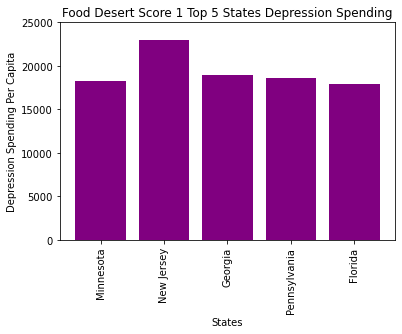

In [20]:
#bar chart that displays food desert category 1 states and amount of spending on depression
#clean up data to float to integrate into segmented information
fooddesert1top5_kf['Depression ']=fooddesert1top5_kf['Depression '].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert1top5_kf['Depression ']

#identify the x and y variables for the bar 
state= fooddesert1top5_kf["State"]
state
#remember to get rid of spaces in columns

depressionspend = fooddesert1top5_kf['Depression ']
depressionspend

plt.bar(x=state, height=depressionspend, color='purple')
                             
plt.xticks(rotation=90)
plt.ylim(0, 25000)
plt.title("Food Desert Score 1 Top 5 States Depression Spending")
plt.xlabel("States")
plt.ylabel("Depression Spending Per Capita")

# Exports graph as a png image file
plt.savefig("../Output/Fig1FD1Top5Depression.png")

plt.show()

<ipython-input-21-083af6649c6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fooddesert2top5_kf['Depression ']=fooddesert2top5_kf['Depression '].astype(str).apply(lambda x: x.replace(',','')).astype(float)


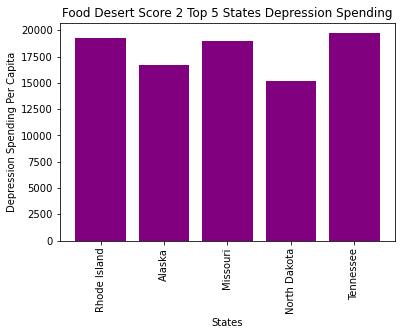

In [21]:
#bar chart that displays food desert category 2 states and amount of spending on depression
#clean up data to float to integrate into segmented information
fooddesert2top5_kf['Depression ']=fooddesert2top5_kf['Depression '].astype(str).apply(lambda x: x.replace(',','')).astype(float)
# fooddesert2top5_kf['Depression ']= fooddesert2top5_kf['Depression '].astype(str).astype(float)
fooddesert2top5_kf['Depression ']

#define x and y variables for bar graph
state= fooddesert2top5_kf["State"]
state
#remember to get rid of spaces in columns

depressionspend = fooddesert2top5_kf['Depression ']
depressionspend

plt.bar(x=state, height=depressionspend, color='purple')
                             
plt.xticks(rotation=90)
#plt.ylim(0, 100000)
plt.title("Food Desert Score 2 Top 5 States Depression Spending")
plt.xlabel("States")
plt.ylabel("Depression Spending Per Capita")

# Exports graph as a png image file
plt.savefig("../Output/Fig2FD2Top5Depression.png")

plt.show()

<ipython-input-22-e99f09e5039d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fooddesert3top5_kf['Depression ']=fooddesert3top5_kf['Depression '].astype(str).apply(lambda x: x.replace(',','')).astype(float)


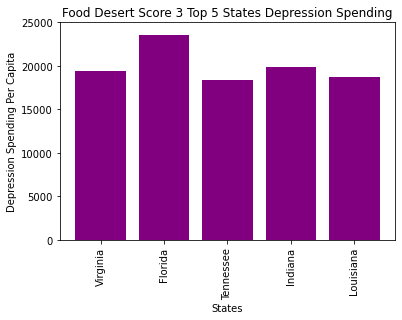

In [22]:
#bar chart that displays food desert category 1 states and amount of spending on depression
#clean up data to float to integrate into segmented information
fooddesert3top5_kf['Depression ']=fooddesert3top5_kf['Depression '].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['Depression ']

#define x and y variables for bar graph
state= fooddesert3top5_kf["State"]
state
#remember to get rid of spaces in columns

depressionspend = fooddesert3top5_kf['Depression ']
depressionspend

plt.bar(x=state, height=depressionspend, color='purple')
                             
plt.xticks(rotation=90)
plt.ylim(0, 25000)
plt.title("Food Desert Score 3 Top 5 States Depression Spending")
plt.xlabel("States")
plt.ylabel("Depression Spending Per Capita")

# Exports graph as a png image file
plt.savefig("../Output/Fig3FD3Top5Depression.png")

plt.show()

<ipython-input-38-2c7d1248d7a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fooddesert3top5_kf['Alcohol Abuse']=fooddesert3top5_kf['Alcohol Abuse'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
<ipython-input-38-2c7d1248d7a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fooddesert3top5_kf['Alzheimer\'s Disease/Dementia']=fooddesert3top5_kf['Alzheimer\'s Disease/Dementia'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
<ipython-input-38-2c7d1248d7a1>:5: SettingWithCopyWa

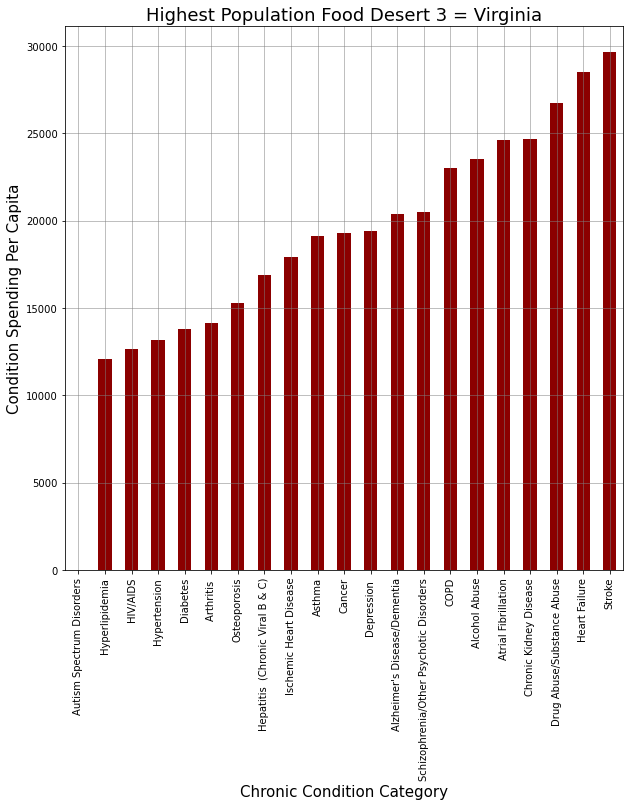

In [38]:
#highest population state in food desert 3 with detail of actual spending across all categories

fooddesert3top5_kf['Alcohol Abuse']=fooddesert3top5_kf['Alcohol Abuse'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['Alzheimer\'s Disease/Dementia']=fooddesert3top5_kf['Alzheimer\'s Disease/Dementia'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['Arthritis ']=fooddesert3top5_kf['Arthritis '].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['Asthma']=fooddesert3top5_kf['Asthma'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['Atrial Fibrillation']=fooddesert3top5_kf['Atrial Fibrillation'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['Autism Spectrum Disorders']=diseasespenddf_kf['Autism Spectrum Disorders'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['Cancer']=fooddesert3top5_kf['Cancer'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['Chronic Kidney Disease']=fooddesert3top5_kf['Chronic Kidney Disease'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['COPD']=fooddesert3top5_kf['COPD'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['Depression ']=fooddesert3top5_kf['Depression '].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['Diabetes']=fooddesert3top5_kf['Diabetes'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['Drug Abuse/Substance Abuse']=fooddesert3top5_kf['Drug Abuse/Substance Abuse'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['HIV/AIDS']=fooddesert3top5_kf['HIV/AIDS'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['Heart Failure']=fooddesert3top5_kf['Heart Failure'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['Hepatitis  (Chronic Viral B & C)']=fooddesert3top5_kf['Hepatitis  (Chronic Viral B & C)'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['Hyperlipidemia']=fooddesert3top5_kf['Hyperlipidemia'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['Hypertension']=fooddesert3top5_kf['Hypertension'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['Ischemic Heart Disease']=fooddesert3top5_kf['Ischemic Heart Disease'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['Osteoporosis']=fooddesert3top5_kf['Osteoporosis'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['Schizophrenia/Other Psychotic Disorders']= fooddesert3top5_kf['Schizophrenia/Other Psychotic Disorders'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3top5_kf['Stroke']=fooddesert3top5_kf['Stroke'].astype(str).apply(lambda x: x.replace(',','')).astype(float)

virginafd3= fooddesert3top5_kf[fooddesert3top5_kf["State"]=="Virginia"]
#vafd3pop_kf = vafd3_kf['Pop2010']
virginafd3

vaxvalue = virginafd3[['Alcohol Abuse', 'Alzheimer\'s Disease/Dementia', 'Arthritis ', 'Asthma','Atrial Fibrillation', 'Autism Spectrum Disorders', 'Cancer','Chronic Kidney Disease', 'COPD', 'Depression ', 'Diabetes','Drug Abuse/Substance Abuse', 'HIV/AIDS', 'Heart Failure','Hepatitis  (Chronic Viral B & C)', 'Hyperlipidemia', 'Hypertension','Ischemic Heart Disease', 'Osteoporosis','Schizophrenia/Other Psychotic Disorders', 'Stroke']]
#vaxvalue = vaxvalue.sort_values(by=vaxvalue, ascending=False)
x_axis = np.arange(len(vaxvalue))
#vaxvalue.plot(kind='bar', figsize=(10,5),  alpha = 1)
vaxvalue.T.sort_values(84).plot(kind='bar', figsize=(5,5),  alpha = 1,legend=None, color=['darkred'])
                                                
plt.grid(linestyle='-',linewidth='0.5', color='grey')
#tick_locations = [disease for disease in x_axis]
#plt.xticks(tick_locations, vaxvalue[['Alcohol Abuse', 'Alzheimer\'s Disease/Dementia', 'Arthritis ', 'Asthma','Atrial Fibrillation', 'Autism Spectrum Disorders', 'Cancer','Chronic Kidney Disease', 'COPD', 'Depression ', 'Diabetes','Drug Abuse/Substance Abuse', 'HIV/AIDS', 'Heart Failure','Hepatitis  (Chronic Viral B & C)', 'Hyperlipidemia', 'Hypertension','Ischemic Heart Disease', 'Osteoporosis','Schizophrenia/Other Psychotic Disorders', 'Stroke']], rotation='vertical')
#plt.xticks(vaxvalue)
#plt.legend()
plt.title('Highest Population Food Desert 3 = Virginia', fontsize = 18)
plt.xlabel("Chronic Condition Category", fontsize = 15)
plt.ylabel("Condition Spending Per Capita", fontsize = 15)

figure = plt.gcf()
figure.set_size_inches(10,10)
# Exports graph as a png image file
plt.savefig("../Output/Fig4FD3VAdiseases.png", dpi=200)

#plt.tight_layout()
plt.show()




In [24]:
#update drug abuse data in food desert that come in as objects
#fooddesert3_kf['Drug Abuse/Substance Abuse']= fooddesert3_kf['Drug Abuse/Substance Abuse'].astype(str).astype(float)
fooddesert3_kf['Drug Abuse/Substance Abuse']= fooddesert3_kf['Drug Abuse/Substance Abuse'].astype(str).apply(lambda x: x.replace(',','')).astype(float)

#group census data by state with food desert of 3
grouped_stateFD3_kf = fooddesert3_kf.groupby('State').sum()
grouped_stateFD3_kf.columns

grouped_stateFD3_kf.head(10)

#grouped_stateFD3_kf['Drug Abuse/Substance Abuse']



<ipython-input-24-dedbe5d43e04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fooddesert3_kf['Drug Abuse/Substance Abuse']= fooddesert3_kf['Drug Abuse/Substance Abuse'].astype(str).apply(lambda x: x.replace(',','')).astype(float)


,CENSUSTRACT,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,Food Desert Score,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,Drug Abuse/Substance Abuse
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,49226931415,7,214265,81928,0,7088,1.002615,5,5,5,15,9,14,22,838.8,2437591,9,9,7,7,7,2,0,14,24947.691420,34453.782476,21026.962273,8452.090271,12165.912239,6966.068922,197001.948552,42.741702,75588.250334,16.575551,46291.005201,9.963489,27988.730995,6.376258,154307.146597,33.313341,34658.491271,7.774290,828.678880,0.162060,116.955227,0.023506,790.190061,0.169200,6300.486504,1.299306,7327.262619,1.450800,4101.945537,2.377362,11669.633299,6.614751,172489.683342,38.067813,64883.462048,14.521272,40093.040082,8.792581,24470.863607,5.697868,138017.211523,30.260561,27836.652246,6.414103,621.902664,0.122955,110.525274,0.022259,709.772176,0.154401,5193.619465,1.093535,6195.474234,1.240893,3398.455929,2.037566,9905.302517,5.740811,3920.729148,1.353792,1486.021349,0.537369,796.090749,0.273678,693.657096,0.234463,3185.733086,1.069059,553.773388,0.225223,1.584534,0.000418,23.942616,0.005038,17.615463,0.005462,138.080067,0.048593,181.192306,0.054984,97.114100,0.095388,238.410891,0.220953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81090,50350,31112,166914,38359,967,139,869,7017,8160,4726,12888,111006.8
Alaska,41173003200,2,65749,18922,1,8190,2.767667,10,10,10,30,10,10,10,306.2,1247196,14,15,12,2,1,13,11,13,35855.740426,38625.908285,28654.740799,17261.816961,18160.471374,14235.664181,55393.247151,16.280166,23793.025682,6.424131,15656.632907,4.290807,3508.646780,1.081272,19912.270795,6.150899,732.826477,0.223979,2929.948349,0.935704,233.037824,0.064167,28127.517750,7.789216,3457.645927,1.116201,1946.862464,0.596835,5725.057077,5.670162,3466.376188,3.191396,49120.382866,14.531501,21766.544717,5.923238,13754.586389,3.768683,3193.464349,0.988606,18097.112081,5.595065,660.870494,0.206279,2358.985916,0.774683,173.452127,0.049268,24907.614046,6.949022,2922.348158,0.957184,1703.284470,0.531077,5211.189472,

In [25]:
#obtain measures of central tendency of Food desserts(3) by state pop and actual spending on drug abuse 
drugabusespend_kf = grouped_stateFD3_kf['Drug Abuse/Substance Abuse']
drugabusespend_kf

mean_numpy = np.mean(drugabusespend_kf)
print(f"The mean spending is {mean_numpy}")

median_numpy = np.median(drugabusespend_kf)
print(f"The median spending is {median_numpy}")

mode_scipy = sts.mode(drugabusespend_kf)
print(f"The mode spending is {mode_scipy}")


drugabusespend_kf.to_csv('../Output/drugabusespend_data.csv')

drugabusespend_kf

The mean spending is 180601.75581395347
The median spending is 141926.8
The mode spending is ModeResult(mode=array([0.]), count=array([1]))


State
Alabama           111006.8
Alaska             85221.3
Arizona                0.0
Arkansas          133115.1
California         73354.4
Colorado          192281.5
Florida            90686.4
Georgia           544784.9
Idaho              87354.1
Illinois          368658.1
Indiana           370833.1
Iowa              204611.7
Kansas            238902.9
Kentucky          269378.0
Louisiana         141926.8
Maine              65534.4
Maryland           56023.1
Michigan          225622.5
Minnesota         298097.0
Mississippi       259736.5
Missouri          247304.2
Montana           188379.6
Nebraska          216585.6
Nevada            100492.3
New Mexico        127941.3
New York           30956.4
North Carolina    322023.1
North Dakota       61920.7
Ohio              241995.3
Oklahoma          194614.3
Oregon             58324.6
Pennsylvania      113524.9
South Carolina     72914.4
South Dakota       50149.1
Tennessee         375377.0
Texas             771889.7
Utah               960

In [26]:
#summary information of all states by disease type
state_diseasespenddf_kf= diseasespenddf_kf[['State', 'Alcohol Abuse',
       'Alzheimer\'s Disease/Dementia', 'Arthritis ', 'Asthma',
       'Atrial Fibrillation', 'Autism Spectrum Disorders', 'Cancer',
       'Chronic Kidney Disease', 'COPD', 'Depression ', 'Diabetes',
       'Drug Abuse/Substance Abuse', 'HIV/AIDS', 'Heart Failure',
       'Hepatitis  (Chronic Viral B & C)', 'Hyperlipidemia', 'Hypertension',
       'Ischemic Heart Disease', 'Osteoporosis',
       'Schizophrenia/Other Psychotic Disorders', 'Stroke']]

state_diseasespenddf_kf.iloc[:,1:]=state_diseasespenddf_kf.iloc[:,1:].astype(str).apply(lambda x: x.str.replace(',','')).astype(float)
state_diseasespenddf_kf

stategroup_diseaseKF= state_diseasespenddf_kf.groupby('State').sum()
stategroup_diseaseKF
statesummaryamts_bydisease = stategroup_diseaseKF.describe()
statesummaryamts_bydisease.to_csv('../Output/statesummaryamts_bydisease.csv')
statesummaryamts_bydisease


C:\Users\brand\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-26-93e01391aa0a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_diseasespenddf_kf.iloc[:,1:]=state_diseasespenddf_kf.iloc[:,1:].astype(str).apply(lambda x: x.str.replace(',','')).astype(float)


,Alcohol Abuse,Alzheimer's Disease/Dementia,Arthritis,Asthma,Atrial Fibrillation,Autism Spectrum Disorders,Cancer,Chronic Kidney Disease,COPD,Depression,Diabetes,Drug Abuse/Substance Abuse,HIV/AIDS,Heart Failure,Hepatitis (Chronic Viral B & C),Hyperlipidemia,Hypertension,Ischemic Heart Disease,Osteoporosis,Schizophrenia/Other Psychotic Disorders,Stroke
count,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,54.000000,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01
mean,1.247902e+06,1.244556e+06,8.873462e+05,1.278159e+06,1.367534e+06,144119.540741,1.160401e+06,1.442478e+06,1.398243e+06,1.130352e+06,8.609035e+05,1.333631e+06,3.329798e+05,1.541919e+06,9.175534e+05,8.036845e+05,8.125006e+05,1.051132e+06,1.128737e+06,1.353751e+06,1.654929e+06
std,1.039373e+06,1.101455e+06,7.472761e+05,1.078784e+06,1.154243e+06,121997.204128,9.554642e+05,1.208374e+06,1.171580e+06,9.800767e+05,7.337583e+05,1.067999e+06,3.216079e+05,1.269223e+06,8.276716e+05,6.609885e+05,6.676249e+05,8.629005e+05,9.516005e+05,1.176625e+06,1.387197e+06
min,1.602030e+04,9.201400e+03,6.807400e+03,1.126680e+04,1.376100e+04,0.000000,9.413000e+03,1.477240e+04,1.397390e+04,8.469100e+03,8.299200e+03,1.648510e+04,9.760900e+03,1.482380e+04,2.330030e+04,6.468900e+03,7.869500e+03,1.048680e+04,6.276300e+03,1.049230e+04,1.632150e+04
25%,4.436017e+05,4.239996e+05,2.978833e+05,4.019020e+05,4.688507e+05,49713.500000,4.275750e+05,5.013611e+05,4.726453e+05,3.783075e+05,2.797706e+05,5.283919e+05,8.080960e+04,5.339118e+05,2.509412e+05,2.741962e+05,2.864344e+05,3.730849e+05,3.727489e+05,4.284682e+05,5.737528e+05
50%,1.116452e+06,1.133024e+06,8.470936e+05,1.213899e+06,1.362551e+06,114949.850000,1.145287e+06,1.395003e+06,1.330730e+06,1.085191e+06,8.285068e+05,1.130202e+06,2.120786e+05,1.524116e+06,6.702537e+05,7.954957e+05,8.165721e+05,1.023352e+06,1.082029e+06,1.208436e+06,1.513915e+06
75%,1.766826e+06,1.768534e+06,1.343889e+06,1.947783e+06,2.039321e+06,197988.500000,1.794398e+06,2.154656e+06,2.086854e+06,1.657068e+06,1.295985e+06,1.921252e+06,5.174617e+05,2.325507e+06,1.454654e+06,1.177008e+06,1.184042e+06,1.578283e+06,1.715628e+06,1.950043e+06,2.466372e+06
max,5.620965e+06,6.484266e+06,4.362042e+06,6.091906e+06,6.627122e+06,474540.600000,5.385515e+06,7.036199e+06,6.884454e+06,5.872815e+06,4.304248e+06,5.326815e+06,1.206618e+06,7.164035e+06,4.123805e+06,3.850646e+06,3.912493e+06,4.926817e+06,5.524740e+06,6.625055e+06,7.778813e+06


In [27]:
#viewing stated group disease information
stategroup_diseaseKF

#stategroup_diseaseKF.columns

,Alcohol Abuse,Alzheimer's Disease/Dementia,Arthritis,Asthma,Atrial Fibrillation,Autism Spectrum Disorders,Cancer,Chronic Kidney Disease,COPD,Depression,Diabetes,Drug Abuse/Substance Abuse,HIV/AIDS,Heart Failure,Hepatitis (Chronic Viral B & C),Hyperlipidemia,Hypertension,Ischemic Heart Disease,Osteoporosis,Schizophrenia/Other Psychotic Disorders,Stroke
State,,,,,,,,,,,,,,,,,,,,,
Alabama,1473552.3,1401947.5,905605.3,1345831.8,1429573.5,109889.2,1223011.3,1489236.8,1434835.4,1197819.8,897784.5,1417819.2,519181.1,1570837.5,1202135.9,788353.1,800326.1,1097817.3,1141275.4,1528347.7,1801779.0
Alaska,628567.8,666421.9,548814.0,556597.3,685163.8,27870.5,608036.2,945481.6,833195.0,641608.7,539418.4,590320.6,23664.5,928307.2,160878.2,627769.7,574612.6,683616.0,596130.1,268544.7,722427.1
Arizona,428592.8,348527.8,232715.4,334199.2,375362.6,56432.2,308453.9,377923.5,403160.0,315889.7,236920.5,465695.4,193889.0,457764.2,338630.6,214419.5,224676.9,295625.4,288859.9,428037.7,507750.5
Arkansas,1663912.3,1576030.9,1043443.7,1646524.8,1636514.3,64446.1,1478526.5,1870131.1,1683359.8,1348428.1,1041517.8,1598321.5,288272.9,1812096.8,970978.7,958934.4,950054.1,1202430.3,1417863.6,1776218.2,2059031.8
California,1644686.0,1385003.0,940574.5,1378821.0,1559419.7,418817.5,1263716.7,1591249.7,1648471.5,1257523.5,954982.7,1890799.2,797311.8,1791716.6,1412194.7,833981.7,908705.3,1219891.4,1155100.3,1428815.5,1975932.7
Colorado,1124451.4,1237255.5,956088.3,1297494.8,1394499.7,134805.7,1165064.5,1522085.1,1432885.2,1198851.7,893838.6,1487602.7,163637.5,1564734.8,662596.2,928141.3,956635.1,1113511.4,1251134.1,1273721.7,1508157.4
Connecticut,231726.0,220381.1,158233.1,212378.9,235267.1,83785.8,199177.9,249126.0,257947.7,205045.9,154197.9,244648.7,171398.2,283127.8,221168.8,130832.9,139245.8,194866.4,181891.9,234543.2,293250.6
Delaware,102737.6,104756.4,61781.5,88483.2,101826.2,35049.9,77326.5,102397.1,103855.7,88805.4,60005.4,114256.7,56006.2,125882.2,98041.8,50101.3,54374.0,77329.5,74561.4,101794.4,122098.2
District of Columbia,30802.6,28153.4,18051.0,28582.3,32923.9,6848.4,22577.8,33714.7,37492.2,27139.6,20560.6,33878.9,21279.1,36409.6,31451.7,18272.3,17814.5,26755.9,19495.5,25680.0,40451.9


In [28]:
#stategroup_diseaseKF.index
stategroup_diseaseKF.loc['National']

Alcohol Abuse                              25641.4
Alzheimer's Disease/Dementia               24128.1
Arthritis                                  16096.9
Asthma                                     23361.0
Atrial Fibrillation                        25358.6
Autism Spectrum Disorders                   8370.0
Cancer                                     20451.8
Chronic Kidney Disease                     25862.1
COPD                                       26039.5
Depression                                 20889.5
Diabetes                                   16085.7
Drug Abuse/Substance Abuse                 27517.7
HIV/AIDS                                   19234.1
Heart Failure                              29187.0
Hepatitis  (Chronic Viral B & C)           26553.2
Hyperlipidemia                             13908.8
Hypertension                               14598.6
Ischemic Heart Disease                     19526.1
Osteoporosis                               19370.3
Schizophrenia/Other Psychotic D

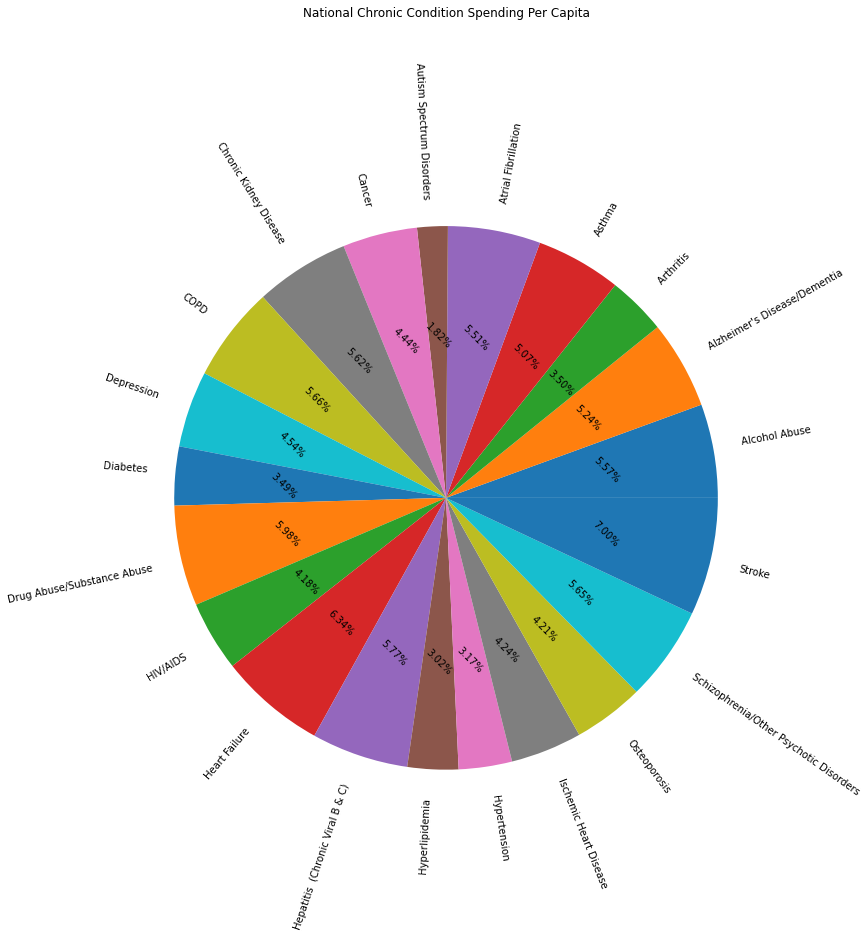

In [39]:
#pie chart that reports actual spending as a percentage of each disease%.2f'
#
#make plot bigger 
#legend colors

w,l,p = plt.pie(stategroup_diseaseKF.loc['National'], labels=stategroup_diseaseKF.loc['National'].index, autopct="%0.2f%%", radius=2.5, rotatelabels=True)
for t in p:
  t.set_rotation(315) 

figure = plt.gcf()
figure.set_size_inches(5,5)

# add title
plt.title("National Chronic Condition Spending Per Capita",y=2.25)

# Exports graph as a png image file
plt.savefig("../Output/Fig5FD3VAdiseasespie.png")

#display chart
plt.show()

<ipython-input-30-4f40ae0471fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fooddesert3_kf['Cancer']= fooddesert3_kf['Cancer'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
<ipython-input-30-4f40ae0471fe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fooddesert3_kf['POP2010']= fooddesert3_kf['POP2010'].astype(str).apply(lambda x: x.replace(',','')).astype(float)


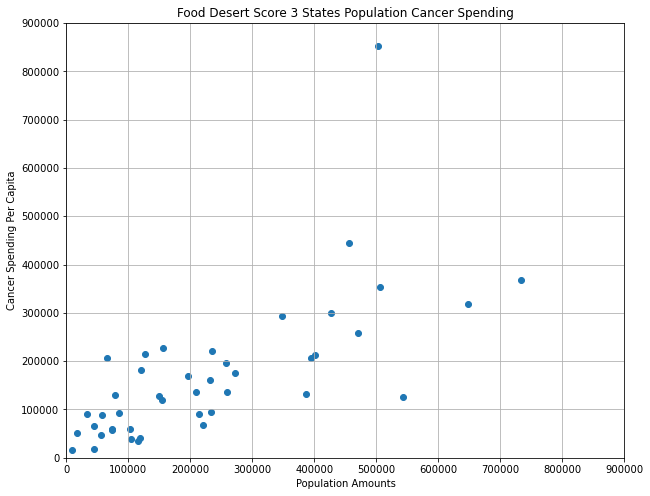

In [30]:
#scatter plot of all the state populations with highest food desert score (3) and 3 actual spending on cancer
plt.figure(figsize=(10,8))

fooddesert3_kf['Cancer']= fooddesert3_kf['Cancer'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3_kf['POP2010']= fooddesert3_kf['POP2010'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
grouped_stateFD3_kf= fooddesert3_kf.groupby('State').sum()
plt.scatter(grouped_stateFD3_kf["POP2010"],grouped_stateFD3_kf["Cancer"] , linewidths=1, marker="o")
                                                                       
plt.title("Food Desert Score 3 States Population Cancer Spending")
plt.xlabel("Population Amounts")
plt.ylabel("Cancer Spending Per Capita")
plt.grid(True)


plt.xlim(0,900000)
plt.ylim(0,900000)

# Exports graph as a png image file
plt.savefig("../Output/Fig6FD3statecancer.png")

plt.show()


In [31]:
#display food desert 3 category by cancer
fooddesert3_kf
fooddesert3_kf['Cancer']= fooddesert3_kf['Cancer'].astype(str).apply(lambda x: x.replace(',','')).astype(float)

fooddesert3_kf['Cancer'].describe()

<ipython-input-31-d28cc100679d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fooddesert3_kf['Cancer']= fooddesert3_kf['Cancer'].astype(str).apply(lambda x: x.replace(',','')).astype(float)


count      368.000000
mean     19803.028533
std       5923.921324
min          0.000000
25%      17626.025000
50%      19467.400000
75%      21680.950000
max      63061.300000
Name: Cancer, dtype: float64

In [32]:
#display food desert 1 category by cancer
fooddesert1_kf
fooddesert1_kf['Cancer']= fooddesert1_kf['Cancer'].astype(str).apply(lambda x: x.replace(',','')).astype(float)

fooddesert1_kf['Cancer'].describe()

<ipython-input-32-aa920ccd4578>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fooddesert1_kf['Cancer']= fooddesert1_kf['Cancer'].astype(str).apply(lambda x: x.replace(',','')).astype(float)


count      107.000000
mean     19876.026168
std       3301.941224
min      13465.300000
25%      17392.350000
50%      19270.000000
75%      21939.500000
max      32714.600000
Name: Cancer, dtype: float64

<ipython-input-33-b01bfec3fff6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fooddesert1_kf['Cancer']= fooddesert1_kf['Cancer'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
<ipython-input-33-b01bfec3fff6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fooddesert1_kf['POP2010']= fooddesert1_kf['POP2010'].astype(str).apply(lambda x: x.replace(',','')).astype(float)


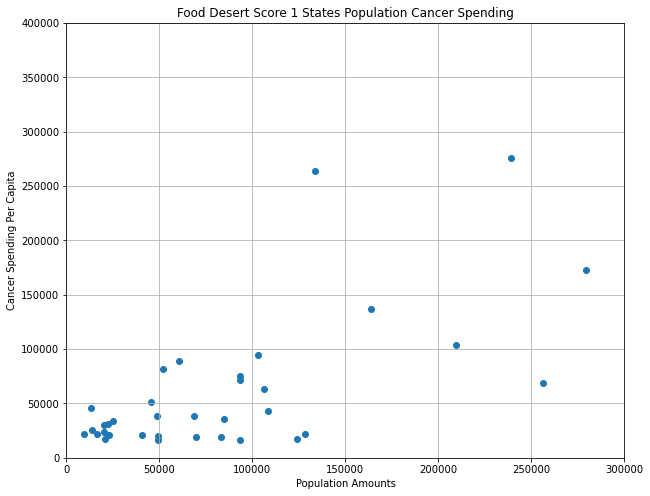

In [33]:
#compare to food desert 1 and cancer
#scatter plot of all the state populations with food desert score (1) and  actual spending on cancer
fooddesert1_kf

grouped_stateFD1_kf = fooddesert1_kf.groupby('State').sum()
grouped_stateFD1_kf.head(10)


plt.figure(figsize=(10,8))


fooddesert1_kf['Cancer']= fooddesert1_kf['Cancer'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert1_kf['POP2010']= fooddesert1_kf['POP2010'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
grouped_stateFD1_kf= fooddesert1_kf.groupby('State').sum()
plt.scatter(grouped_stateFD1_kf["POP2010"],grouped_stateFD1_kf["Cancer"] , linewidths=1, marker="o")
                                                                       
plt.title("Food Desert Score 1 States Population Cancer Spending")
plt.xlabel("Population Amounts")
plt.ylabel("Cancer Spending Per Capita")
plt.grid(True)


plt.xlim(0,300000)
plt.ylim(0,400000)

# Exports graph as a png image file
plt.savefig("../Output/Fig7FD3statecancer.png")

plt.show()


<ipython-input-34-34d79f120dea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fooddesert3_kf['Diabetes']= fooddesert3_kf['Diabetes'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
<ipython-input-34-34d79f120dea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fooddesert3_kf['POP2010']= fooddesert3_kf['POP2010'].astype(str).apply(lambda x: x.replace(',','')).astype(float)


The pvalue is 1.4585985278910248e-06
The line of best fit: y = 0.4x + 29601.38
The r-value is: 0.6602191009425576


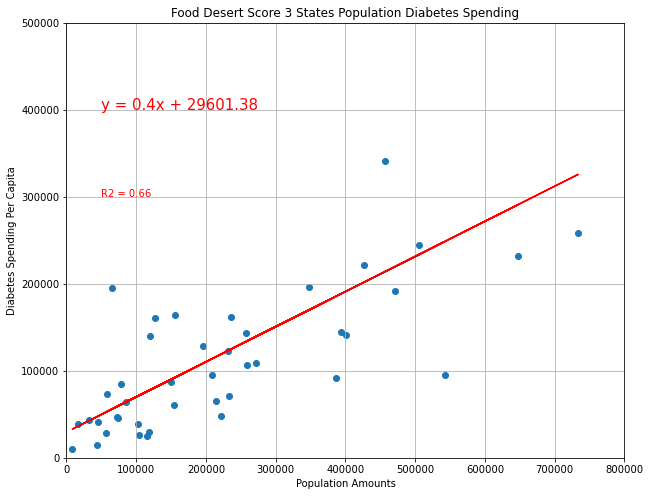

In [34]:
#regression analysis on state populations with highest food desert score (3) and diabetes 
fooddesert3_kf['Diabetes']= fooddesert3_kf['Diabetes'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3_kf['POP2010']= fooddesert3_kf['POP2010'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
grouped_stateFD3_kf= fooddesert3_kf.groupby('State').sum()

x_values = grouped_stateFD3_kf["POP2010"]
y_values = grouped_stateFD3_kf["Diabetes"] 


# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
print(f'The pvalue is {pvalue}')

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line of best fit: {line_eq}")

#establish figure size
plt.figure(figsize=(10,8))

# Plot observations
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Food Desert Score 3 States Population Diabetes Spending")
plt.xlabel('Population Amounts')
plt.ylabel('Diabetes Spending Per Capita')
print(f"The r-value is: {rvalue}")


plt.grid(True)

plt.xlim(0,800000)
plt.ylim(0,500000)

# Add the linear equation to the plot
plt.annotate(line_eq, (50000, 400000), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue,3)}", (50000,300000), fontsize=10, color="red")

# Exports graph as a png image file
plt.savefig("../Output/Fig8FD3statediabetes.png")

#display plot at the end
plt.show()

The pvalue is 1.1109299497486256e-05
The line of best fit: y = 0.41x + 7635.56
The r-value is: 0.6690979629822065


<ipython-input-35-3b7361f98cb3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fooddesert1_kf['Diabetes']= fooddesert1_kf['Diabetes'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
<ipython-input-35-3b7361f98cb3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fooddesert1_kf['POP2010']= fooddesert1_kf['POP2010'].astype(str).apply(lambda x: x.replace(',','')).astype(float)


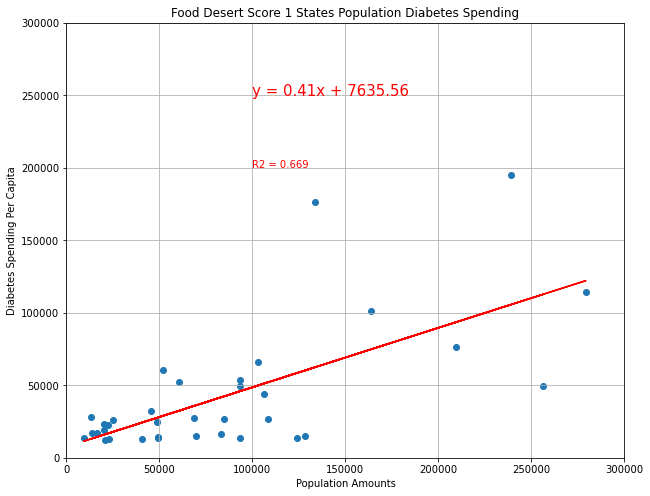

In [35]:
#scatter plot of all the state populations with food desert score (1) and  actual spending on diabetes
fooddesert1_kf

grouped_stateFD1_kf = fooddesert1_kf.groupby('State').sum()
grouped_stateFD1_kf.head(10)


plt.figure(figsize=(10,8))


fooddesert1_kf['Diabetes']= fooddesert1_kf['Diabetes'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert1_kf['POP2010']= fooddesert1_kf['POP2010'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
grouped_stateFD1_kf= fooddesert1_kf.groupby('State').sum()
plt.scatter(grouped_stateFD1_kf["POP2010"],grouped_stateFD1_kf["Diabetes"] , linewidths=1, marker="o")
 
x_values2 = grouped_stateFD1_kf["POP2010"]
y_values2 = grouped_stateFD1_kf["Diabetes"]     
    
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values2, y_values2)
print(f'The pvalue is {pvalue}')

# Calculate the predictions for each value of x (# Rooms)
regression_values2 = x_values2 * slope + intercept

# Plot the regression line
plt.plot(x_values2, regression_values2, "red")

# store a string version of the linear equation, so we can display it on the plot
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The line of best fit: {line_eq2}")
print(f"The r-value is: {rvalue}") 
    
plt.title("Food Desert Score 1 States Population Diabetes Spending")
plt.xlabel('Population Amounts')
plt.ylabel('Diabetes Spending Per Capita')
plt.grid(True)

plt.xlim(0,300000)
plt.ylim(0,300000)

# Add the linear equation to the plot
plt.annotate(line_eq2, (100000, 250000), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue,3)}", (100000,200000), fontsize=10, color="red")

# Exports graph as a png image file
plt.savefig("../Output/Fig9FD1statediabetes.png")

plt.show()

In [36]:
#display food desert 3 category by diabetes
fooddesert3_kf
fooddesert3_kf['Diabetes']= fooddesert3_kf['Diabetes'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert3_kf['Diabetes'].describe()

<ipython-input-36-aafea9566872>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fooddesert3_kf['Diabetes']= fooddesert3_kf['Diabetes'].astype(str).apply(lambda x: x.replace(',','')).astype(float)


count      368.000000
mean     14346.695924
std       3066.646588
min          0.000000
25%      13003.575000
50%      13968.000000
75%      15360.575000
max      47445.300000
Name: Diabetes, dtype: float64

In [37]:
#display food desert 1 category by diabetes
fooddesert1_kf
fooddesert1_kf['Diabetes']= fooddesert1_kf['Diabetes'].astype(str).apply(lambda x: x.replace(',','')).astype(float)
fooddesert1_kf['Diabetes'].describe()

<ipython-input-37-36ceead00afb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fooddesert1_kf['Diabetes']= fooddesert1_kf['Diabetes'].astype(str).apply(lambda x: x.replace(',','')).astype(float)


count      107.000000
mean     13874.500000
std       2020.088703
min      10178.100000
25%      12427.750000
50%      13660.600000
75%      15208.800000
max      19980.800000
Name: Diabetes, dtype: float64